In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_california_housing

In [9]:
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

`Partial Dependence Display (PDD)` e `Individual Conditional Expectation (ICE)` são duas ferramentas relacionadas à interpretação de modelos de aprendizado de máquina, mas elas têm propósitos diferentes e fornecem insights distintos.

**Partial Dependence Plot (PDP):**

O `Partial Dependence Plot (PDP)` exibe o relacionamento entre uma feature específica e a saída do modelo, enquanto mantém as outras features constantes em seus valores médios.
Ele mostra como a saída média do modelo muda à medida que a feature de interesse varia.
PDP ajuda a entender o efeito marginal de uma feature em relação à saída do modelo.
É útil para identificar padrões gerais e tendências de como a resposta média do modelo muda com alterações na feature específica.

**Individual Conditional Expectation (ICE):**

O `Individual Conditional Expectation (ICE)` é uma extensão do PDP e oferece uma visão mais granular.
Em vez de mostrar apenas a resposta média do modelo, o ICE traça a resposta do modelo para cada instância individual nos dados.
Mostra como a resposta do modelo varia para uma única instância à medida que a feature de interesse muda, mantendo as outras features constantes.
ICE é útil para entender como a saída do modelo muda individualmente para cada instância, permitindo observar variações individuais e heterogeneidades nos dados.
Em resumo, o PDP fornece uma visão geral do efeito médio de uma feature na saída do modelo, enquanto o ICE oferece uma visão mais detalhada, mostrando variações individuais. Ambos os métodos são úteis para entender como o modelo se comporta em relação às features, mas a escolha entre eles dependerá dos insights específicos que você está buscando e da granularidade necessária para sua análise. Em muitos casos, pode ser útil usar ambos os métodos para obter uma compreensão completa do comportamento do modelo.

In [3]:
# get dataset
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
# features que quero olhar o PDD
features = ["MedInc", "AveOccup", "HouseAge", "AveRooms"]

In [4]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X, y)

RandomForestRegressor(n_estimators=10)

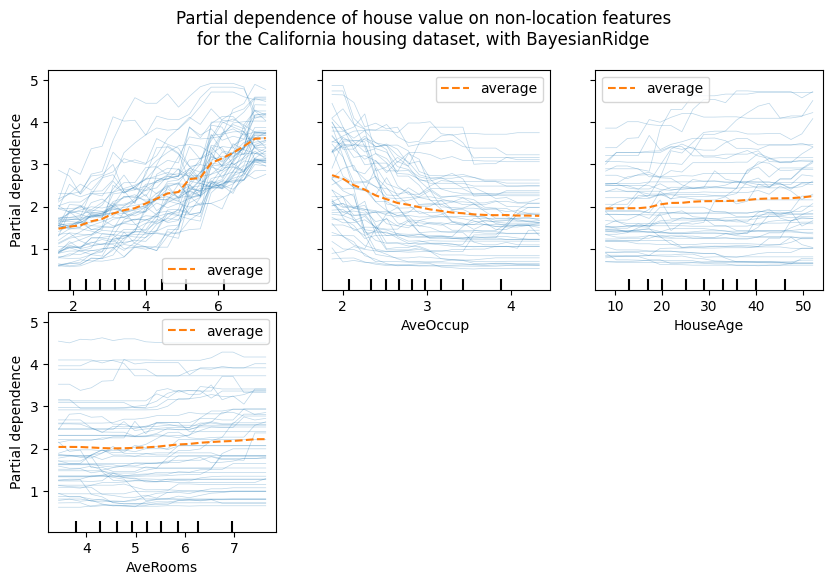

In [5]:
# plot_partial_dependence has been removed in version 1.2. From 1.2, use
# PartialDependenceDisplay instead.
# display = plot_partial_dependence(
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
)
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with BayesianRidge"
)
display.figure_.set_size_inches(10, 6)
display.figure_.subplots_adjust(hspace=0.1)

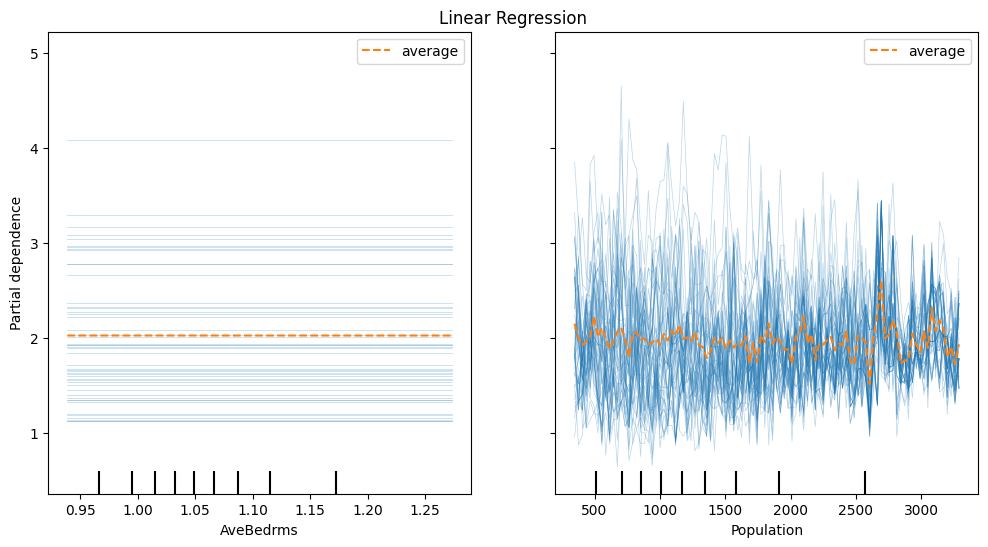

In [12]:
model = KNeighborsRegressor()
model.fit(X, y)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Linear Regression")
mlp_disp = PartialDependenceDisplay.from_estimator(
    model, X, ["AveBedrms", "Population"], subsample=50, ax=ax, kind="both"
)